<a href="https://colab.research.google.com/github/adgcal/wetlabdata/blob/main/Lorentzian_Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

# Calling the spectra 
- First shift to the XLS directory 
- Call XLS file using pandas 

In [4]:
def spec_all(fname,tit):# Assume fname is name of an excel file - in this case .\xlsfiles\somefile.xlsx
  TTspec=pd.read_excel(fname)
  X=TTspec.values
  lam=X[:,0]
  lam=np.delete(lam,0)
  X=np.delete(X, 0, axis=1)
  X=np.delete(X, 0, axis=0)
  r,c=X.shape
  T=range(c)
  plt.figure(figsize=(8, 7))
  for i in range(c):
      plt.plot(lam,X[:,i],label=str(T[i]))
      plt.ylabel(r'$F_{em} $')
      plt.xlabel(r'$\lambda (nm)$')
      plt.title(tit)
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  return T,lam,X 

In [5]:
!pwd

/content


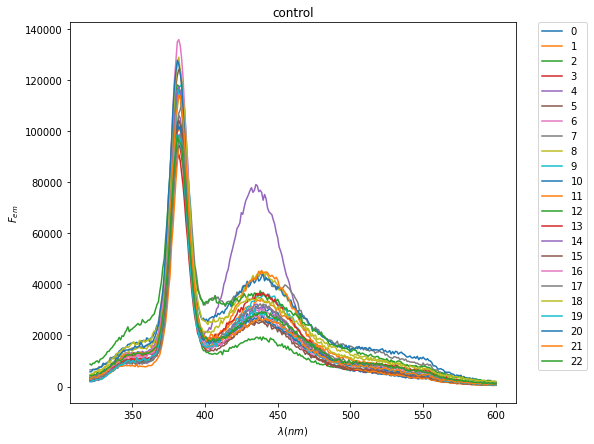

In [6]:
os.chdir("/content/drive/My Drive/ayan_backup/ayan_python/")
#!cd('/Users/apple/Google Drive/ayan_backup/ayan_python/')


T,lam,X =spec_all('./xlsfiles/contp.xlsx','control')


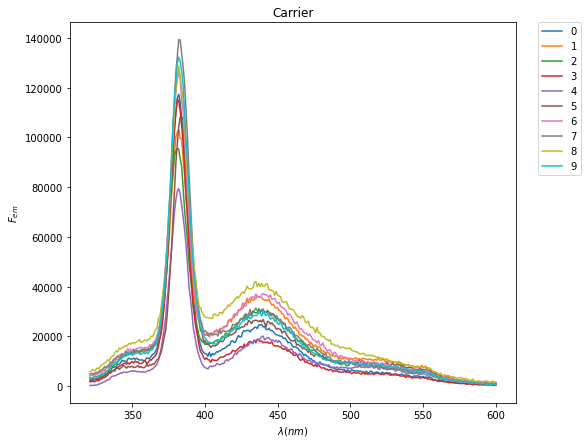

In [7]:
 Tcar,lamcar,Xcar =spec_all('./xlsfiles/carSFS.xlsx','Carrier')


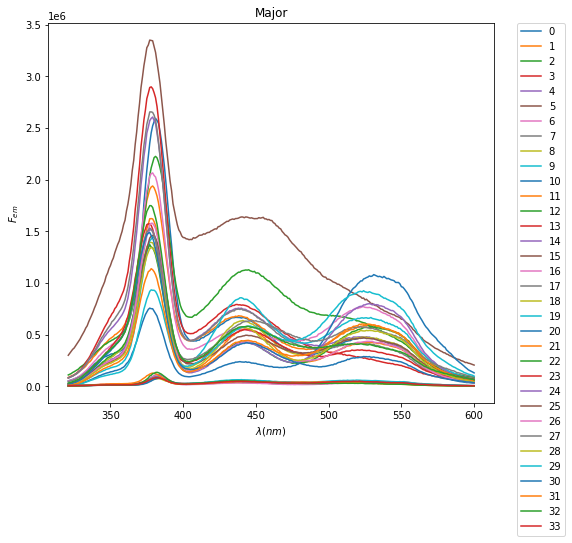

In [8]:
T,lam,X =spec_all('./xlsfiles/T.xlsx','Major')


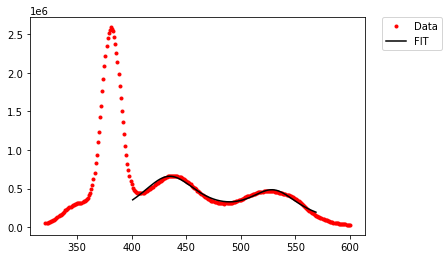

In [9]:
def lorentzian2(x,amp1,wid1,cen1,amp2,wid2,cen2):
   return (amp1*wid1**2/((x-cen1)**2+wid1**2)) + (amp2*wid2**2/((x-cen2)**2+wid2**2)) 

y=X[:,0]
xdata=lam[ (lam-400)*(lam-570)<0]
ydata=y[ (lam-400)*(lam-570)<0]
plt.plot(xdata,ydata)
p0=np.array([6E5,5,430,4E5,12,525])
params, params_covariance = optimize.curve_fit(lorentzian2,xdata,ydata,p0)
params=np.abs(params)
yth=lorentzian2(xdata, params[0],params[1],params[2],params[3],params[4],params[5])
plt.plot(lam, X[:,0] ,'r.',label='Data')

plt.plot(xdata, yth,'k',label='FIT')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



In [10]:
params

array([6.23012612e+05, 3.57426947e+01, 4.34304755e+02, 4.08109348e+05,
       3.00733352e+01, 5.30142482e+02])

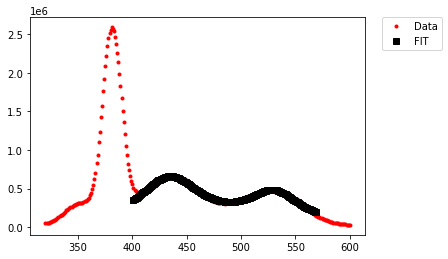

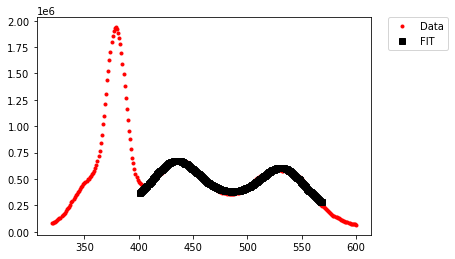

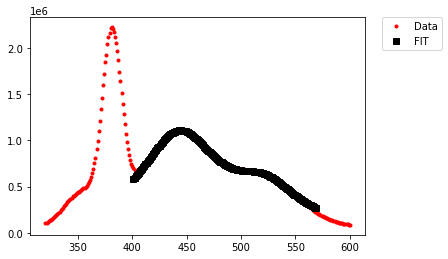

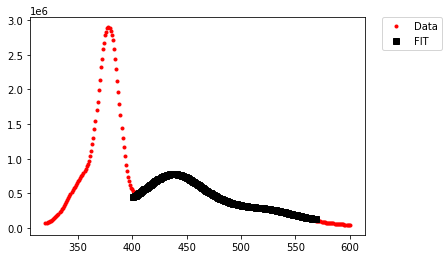

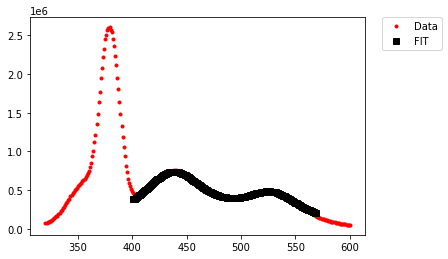

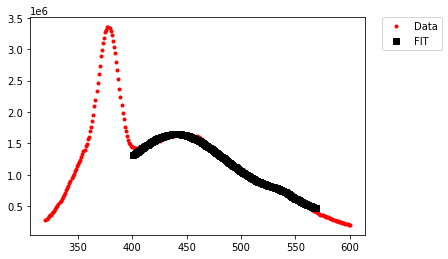

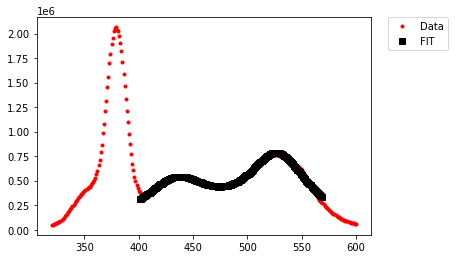

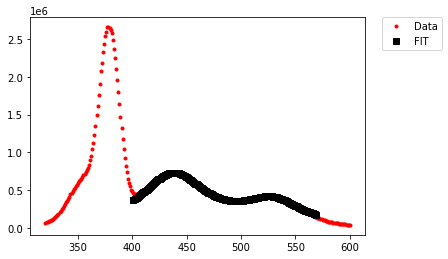

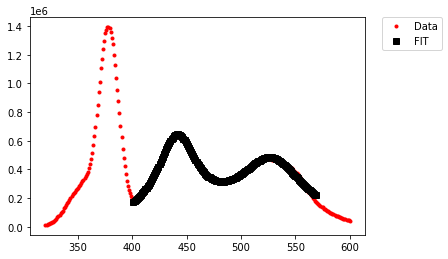

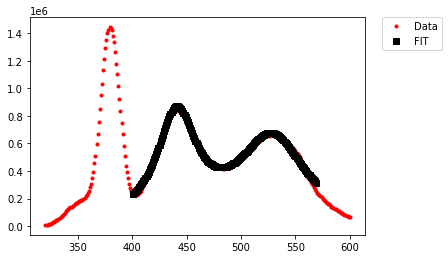

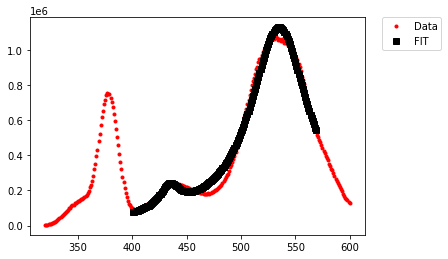

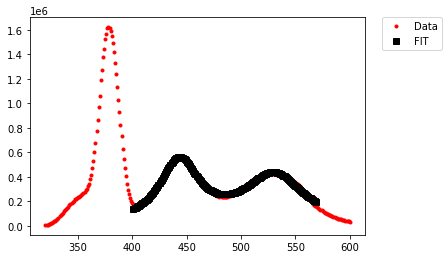

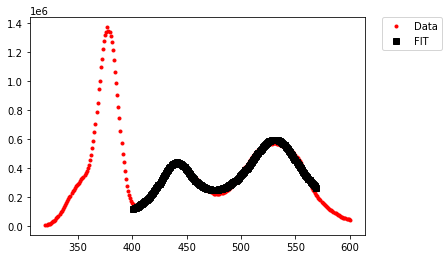

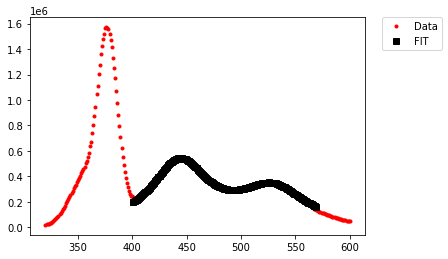

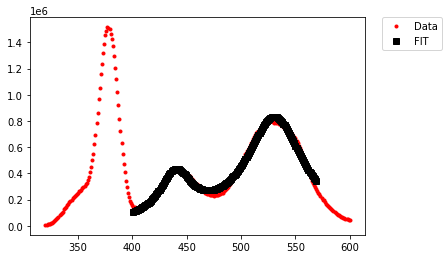

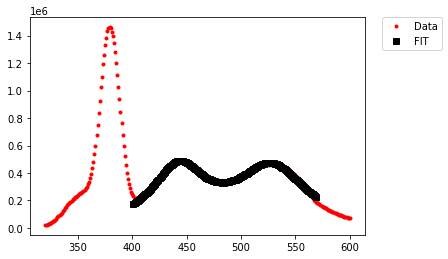

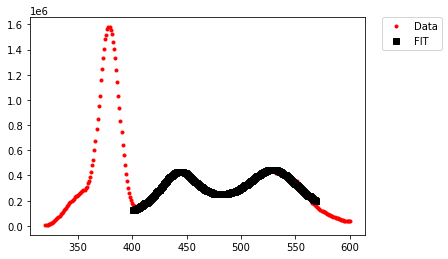

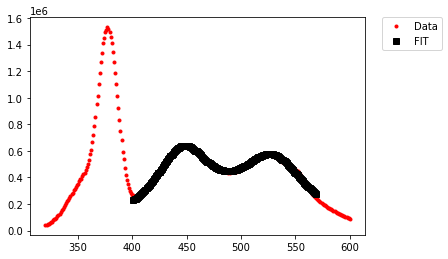

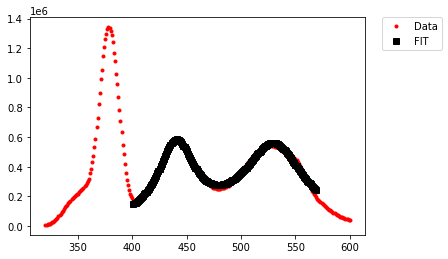

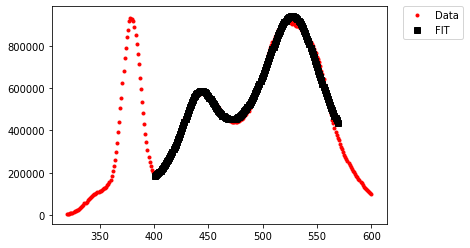

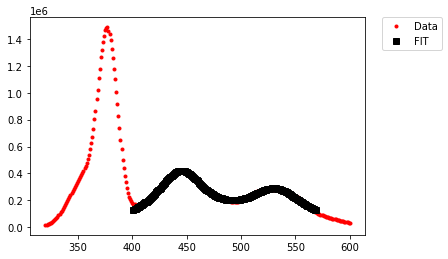

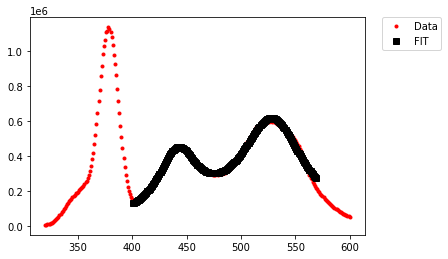

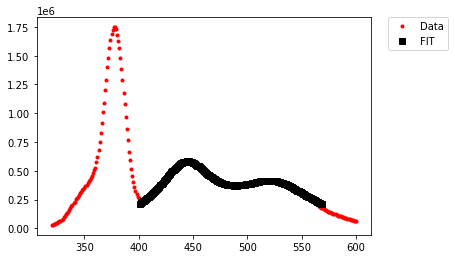

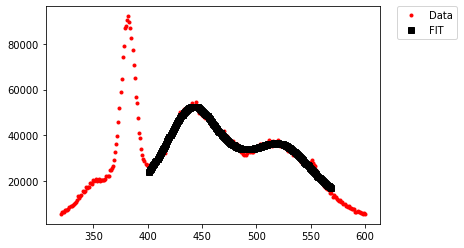

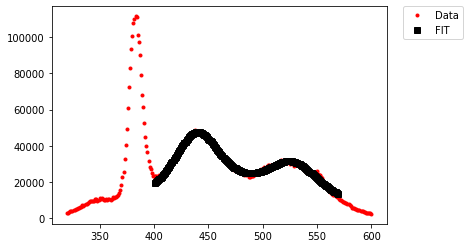

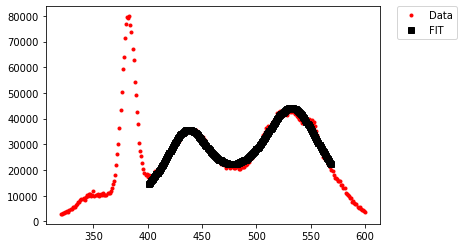

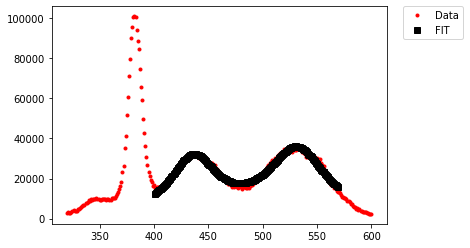

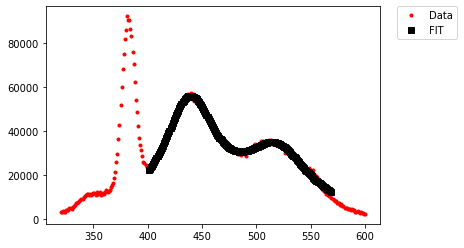

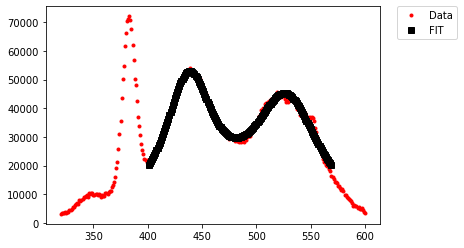

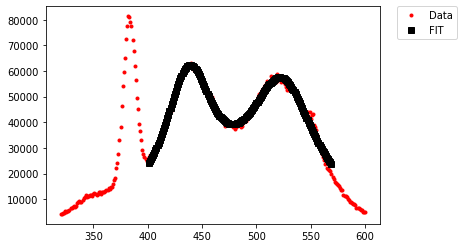

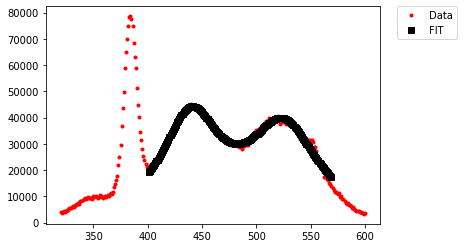

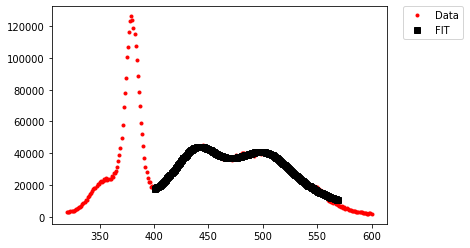

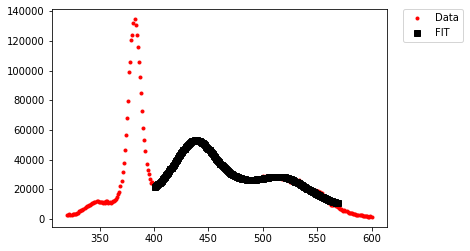

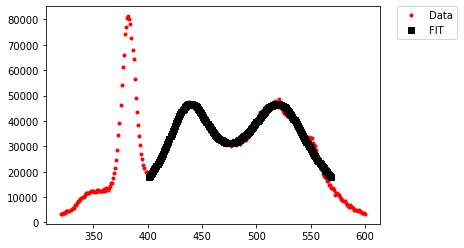

In [11]:
df_spec=pd.read_excel('./xlsfiles/T.xlsx')
lam=df_spec['wavelen']
df0=df_spec.drop(columns=['wavelen'])
h=list(df0)
p0=np.array([6E5,5,430,4E5,12,525])
pp0=np.empty([len(h),6])
for i in np.arange(len(h)):
  ydata=df0[h[i]]
  xdata=lam
  xdata=lam[ (lam-400)*(lam-570)<0]
  ydata=ydata[ (lam-400)*(lam-570)<0]
  nan_array = np.isnan(ydata)
  not_nan_array = ~ nan_array
  y2 = ydata[not_nan_array]
  x2=xdata[not_nan_array]
  params, params_covariance = optimize.curve_fit(lorentzian2,x2,y2,p0)
  params=np.abs(params)
  pp0[i,:]=params
  plt.figure(figsize=(6, 4))
  plt.plot(lam, df0[h[i]] ,'r.',label='Data')
  plt.plot(xdata, lorentzian2(xdata, params[0],params[1],params[2],params[3],params[4],params[5]),'ks',label='FIT')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()

# Creating a formatted parameter output 

In [12]:
from math import log10, floor
def round_sig(x, sig):
  return raound(x, sig-int(floor(log10(abs(x))))-1)

def format2dec(x):
    return "{:.1f}".format(x)


def f2d(xarr):
    m=np.zeros(np.size(xarr))
    for i in range(m.shape[0]):
        m[i]=format2dec(xarr[i])
    return m 


In [13]:
D={'alpha_1':f2d(pp0[:,0]),'omega_1':f2d(pp0[:,1]),'lambdamax_1':f2d(pp0[:,2]),'alpha_2':f2d(pp0[:,3]),'omega_2':f2d(pp0[:,4]),'lambdamax_2':f2d(pp0[:,5])}
df=pd.DataFrame(D)
h=list(df0)
L = [x[0:3] for x in h]
dfP=df.set_index(np.array(L))
dfP.to_csv('Tparams.csv')
dfP

,alpha_1,omega_1,lambdamax_1,alpha_2,omega_2,lambdamax_2
T1,623012.6,35.7,434.3,408109.3,30.1,530.1
T2,617362.8,35.6,434.1,532706.9,33.3,531.9
T3,1037040.5,44.4,442.8,387878.7,37.3,522.6
T4,760456.8,42.6,437.7,129070.0,36.0,526.3
T5,694242.4,37.3,437.5,381900.5,33.5,528.2
T6,1645618.6,78.1,440.1,109296.1,18.3,536.9
T7,449334.5,39.1,434.8,715533.6,35.2,527.6
T8,696723.9,37.0,437.5,320235.0,33.0,528.8
T9,572784.2,22.6,440.9,448022.4,37.6,527.5
T10,770791.3,22.3,440.6,631458.7,38.0,528.3


# Trying the L-fit with three peaks 

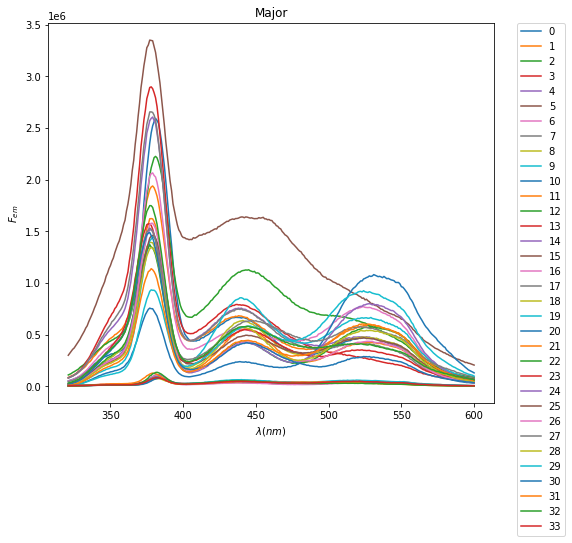

In [14]:
def lorentzian3(x,amp1,wid1,cen1,amp2,wid2,cen2,amp3,wid3,cen3):
   return (amp1*wid1**2/((x-cen1)**2+wid1**2)) + (amp2*wid2**2/((x-cen2)**2+wid2**2))+(amp3*wid3**2/((x-cen3)**2+wid3**2))
T,lam,X =spec_all('./xlsfiles/T.xlsx','Major')


## Conclusion: 3 peak Lorentzian - not good 

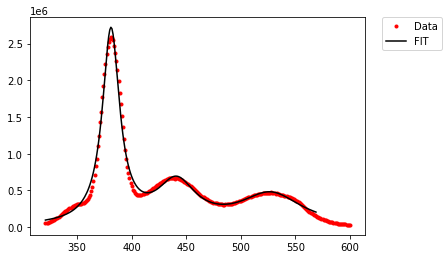

In [15]:
y=X[:,0]
xdata=lam[ (lam-300)*(lam-570)<0]
ydata=y[ (lam-300)*(lam-570)<0]
p0=np.array([6E5,5,370,4E5,12,430,1E5,10,525])
params, params_covariance = optimize.curve_fit(lorentzian3,xdata,ydata,p0)
yth=lorentzian3(xdata, params[0],params[1],params[2],params[3],params[4],params[5],params[6],params[7],params[8]  )
plt.plot(lam, X[:,0] ,'r.',label='Data')

plt.plot(xdata, yth,'k',label='FIT')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()



## But for a few other entries 



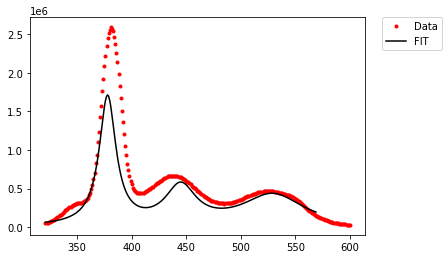

In [16]:
y=X[:,11]
xdata=lam[ (lam-300)*(lam-570)<0]
ydata=y[ (lam-300)*(lam-570)<0]
p0=np.array([6E5,5,370,4E5,12,430,1E5,10,525])
params, params_covariance = optimize.curve_fit(lorentzian3,xdata,ydata,p0)
yth=lorentzian3(xdata, params[0],params[1],params[2],params[3],params[4],params[5],params[6],params[7],params[8]  )
plt.plot(lam, X[:,0] ,'r.',label='Data')

plt.plot(xdata, yth,'k',label='FIT')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

## We shall consider the Gaussian fit for the trp peak 

array([1.75509590e+07, 3.77729566e+02, 9.33446001e+00])

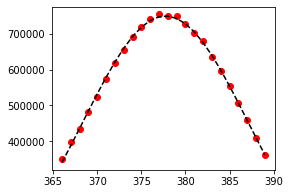

In [17]:
def tgaussian(x_array, amp1,cen1,sigma1):
  return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))
# for trp only 



y=X[:,10]
xdata=lam[ (lam-365)*(lam-390)<0]
ydata=y[ (lam-365)*(lam-390)<0]
popt_gauss, pcov_gauss = scipy.optimize.curve_fit(tgaussian, xdata, ydata, p0=[1E6, 370, 12])

fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(xdata, ydata, "ro")
ax1.plot(xdata,tgaussian(xdata, *popt_gauss), 'k--')#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

popt_gauss

In [18]:
def tgaussian3(x_array, amp1,cen1,sigma1,amp2,cen2,sigma2,amp3,cen3,sigma3):
  return tgaussian(x_array, amp1,cen1,sigma1)+tgaussian(x_array, amp2,cen2,sigma2)+tgaussian(x_array, amp3,cen3,sigma3)


array([3.16074002e+07, 3.78893094e+02, 6.67690951e+00, 1.40586025e+08,
       4.28198083e+02, 1.06178619e+02, 9.93957143e+06, 3.88039515e+02,
       5.18075560e+00])

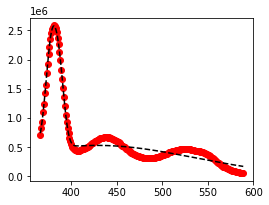

In [19]:
y=X[:,0]
xdata=lam[ (lam-365)*(lam-590)<0]
ydata=y[ (lam-365)*(lam-590)<0]
popt_gauss, pcov_gauss = scipy.optimize.curve_fit(tgaussian3, xdata, ydata, p0=[1E6, 370, 12,1E6, 370, 12,1E6, 370, 12])

fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(xdata, ydata, "ro")
ax1.plot(xdata,tgaussian3(xdata, *popt_gauss), 'k--')#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

popt_gauss


## This seems to be viable option - fit each single peak with Lorentzian
 - For one spectrum run the three peaks in loops to generate a parameter space 
 - Modulate the program accordingly 

In [20]:

def format2dece(x):
    return "{:.2e}".format(x)


def f2de(xarr):
    m=np.zeros(np.size(xarr))
    for i in range(m.shape[0]):
        m[i]=format2dece(xarr[i])
    return m 
def lorentzian(x,amp,wid,cen):
   return (amp*wid**2/((x-cen)**2+wid**2))  

def lorentzian2(x,amp1,wid1,cen1,amp2,wid2,cen2):
   return lorentzian(x,amp1,wid1)+lorentzian(x,amp2,wid2)



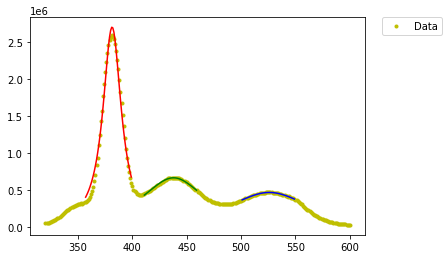

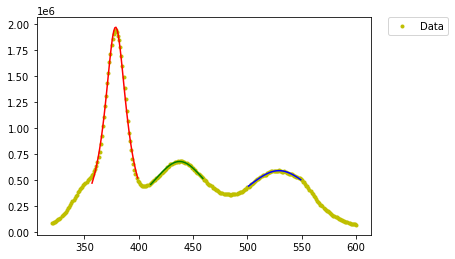

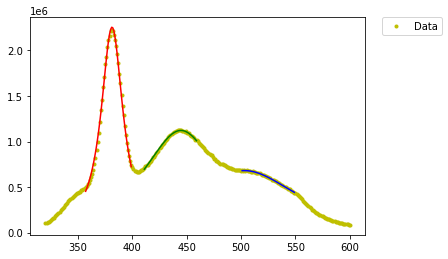

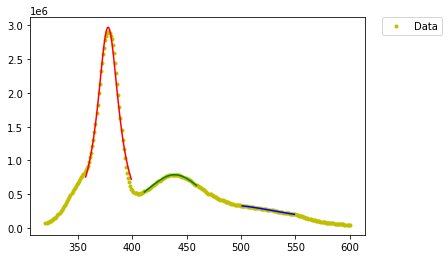

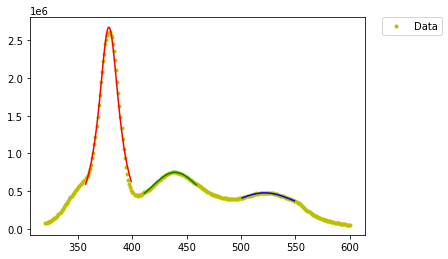

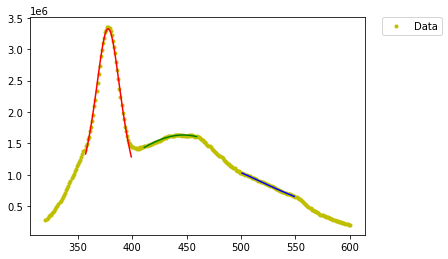

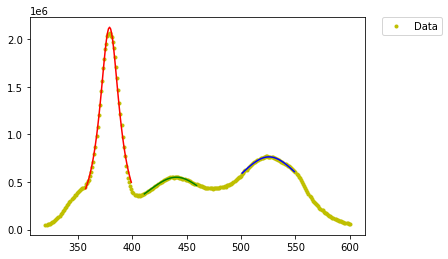

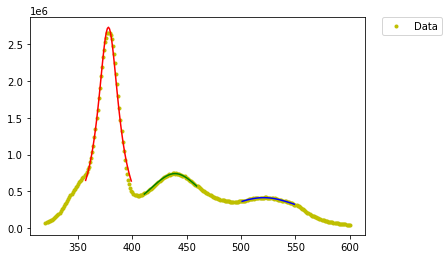

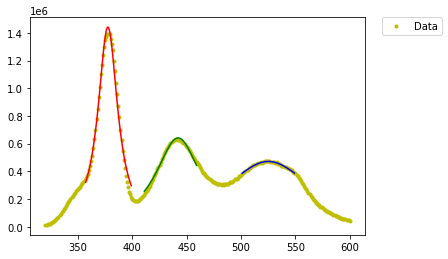

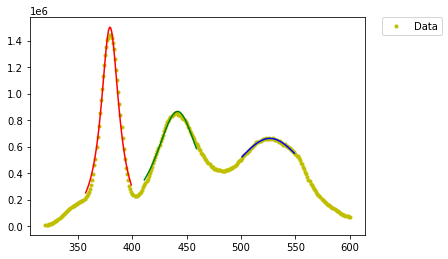

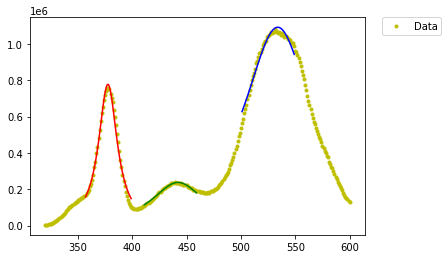

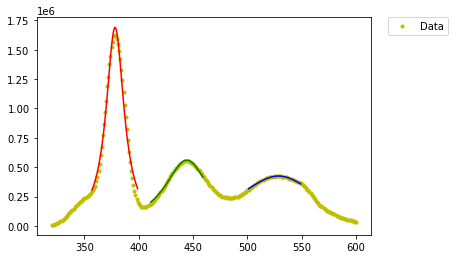

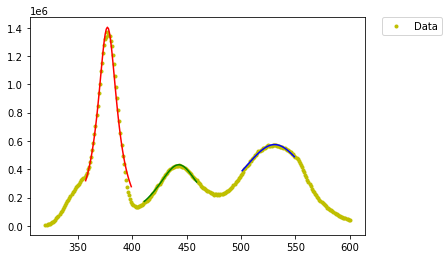

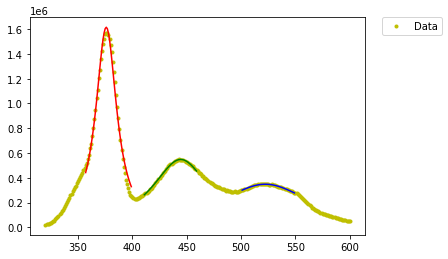

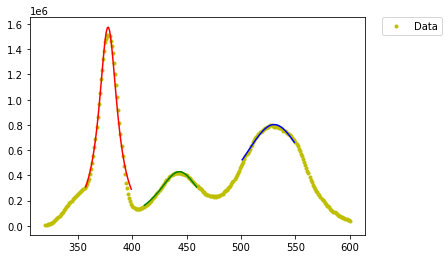

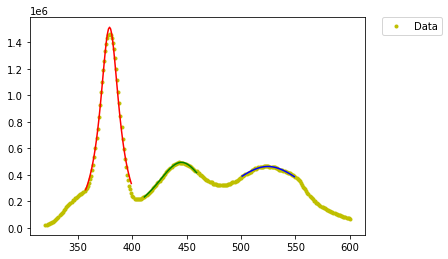

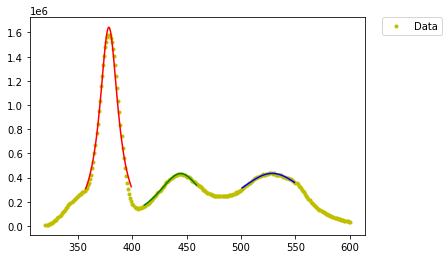

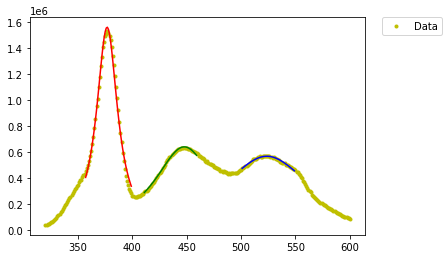

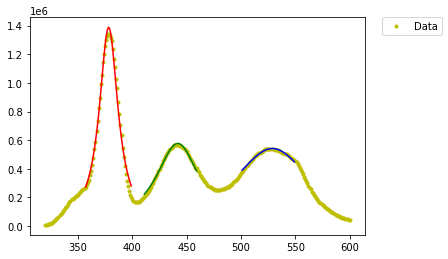

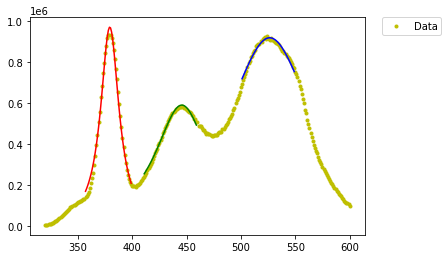

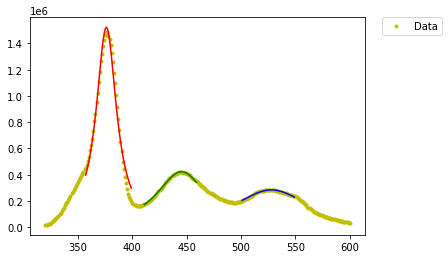

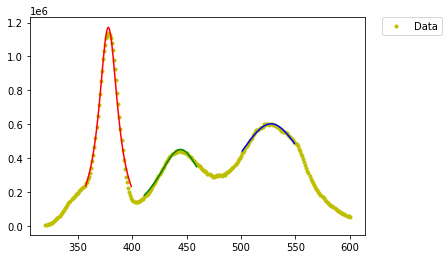

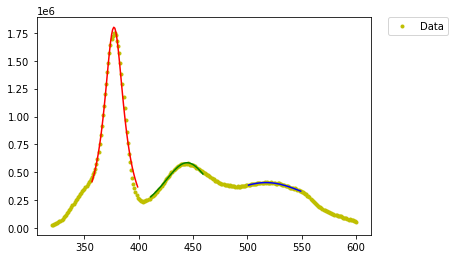

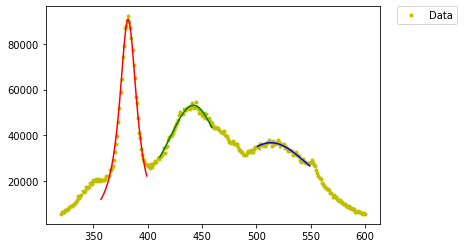

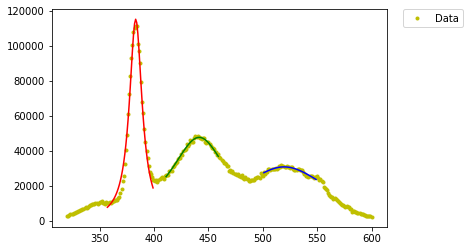

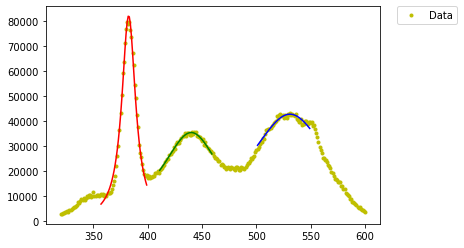

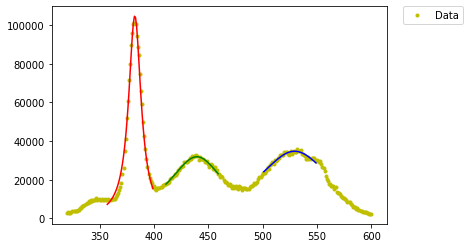

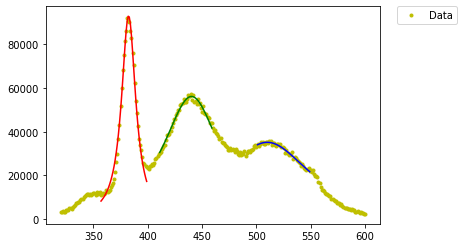

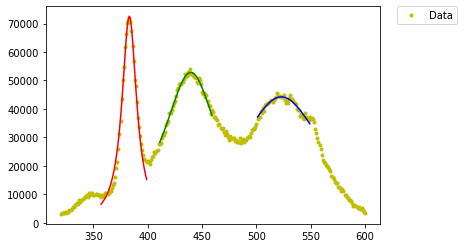

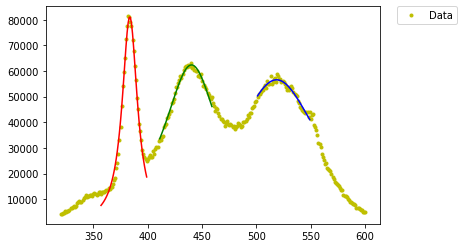

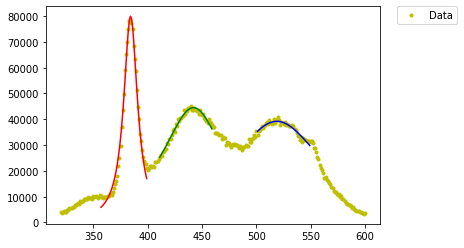

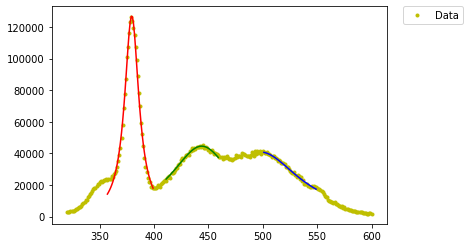

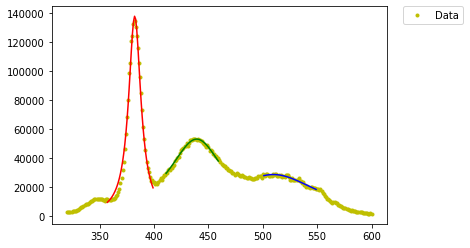

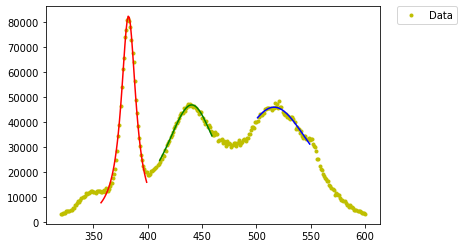

In [21]:

df_spec=pd.read_excel('./xlsfiles/T.xlsx')
lam=df_spec['wavelen']
df0=df_spec.drop(columns=['wavelen'])
h=list(df0)
pp0=np.empty([len(h),9])
for i in np.arange(len(h)):
  y=df0.values[:,i]
  xdata=lam[ (lam-356)*(lam-400)<0]
  ydata=y[(lam-356)*(lam-400)<0]
  p0=np.array([6E5,5,370])
  params, params_covariance = optimize.curve_fit(lorentzian,xdata,ydata,p0)
  yth=lorentzian(xdata, params[0],params[1],params[2]  )
  plt.plot(lam, y ,'y.',label='Data')
  plt.plot(xdata, yth,'r')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    #
  xdata1=lam[ (lam-410)*(lam-460)<0]
  ydata1=y[ (lam-410)*(lam-460)<0]
  p01=np.array([1E5,5,425])
  params1, params_covariance1 = optimize.curve_fit(lorentzian,xdata1,ydata1,p01)
  yth1=lorentzian(xdata1, params1[0],params1[1],params1[2]  )
  plt.plot(xdata1, yth1,'g')

  xdata2=lam[ (lam-500)*(lam-550)<0]
  ydata2=y[ (lam-500)*(lam-550)<0]
  p02=np.array([0.5E5,5,525])
  params2, params_covariance2 = optimize.curve_fit(lorentzian,xdata2,ydata2,p02)
  yth2=lorentzian(xdata2, params2[0],params2[1],params2[2]  )
  plt.plot(xdata2, yth2,'b')
  plt.show()
  prms= np.array([params,params1,params2])
  P=np.abs(prms.reshape(9,1).T)
  pp0[i,:]=P



In [22]:
D3={'alpha_1':f2de(pp0[:,0]),'omega_1':f2de(pp0[:,1]),'lambdamax_1':f2de(pp0[:,2]),'alpha_2':f2de(pp0[:,3]),'omega_2':f2de(pp0[:,4]),'lambdamax_2':f2de(pp0[:,5]), 'alpha_3':f2de(pp0[:,6]),'omega_3':f2de(pp0[:,7]),'lambdamax_3':f2de(pp0[:,8])}


In [23]:

df=pd.DataFrame(D3)
h=list(df0)
L = [x[0:3] for x in h]
dfP=df.set_index(np.array(L))
dfP.to_csv('Tparams3.csv')
dfP

,alpha_1,omega_1,lambdamax_1,alpha_2,omega_2,lambdamax_2,alpha_3,omega_3,lambdamax_3
T1,2700000.0,10.20,381.0,665000.0,36.5,438.0,467000.0,47.7,526.0
T2,1970000.0,12.10,379.0,675000.0,38.1,438.0,587000.0,48.1,529.0
T3,2260000.0,12.20,381.0,1120000.0,43.0,445.0,681000.0,62.7,503.0
T4,2970000.0,12.10,378.0,788000.0,40.3,439.0,342000.0,77.3,485.0
T5,2680000.0,11.40,378.0,750000.0,36.6,439.0,477000.0,51.1,522.0
T6,3330000.0,16.90,378.0,1640000.0,96.5,447.0,1190000.0,95.3,464.0
T7,2130000.0,11.10,379.0,550000.0,43.0,440.0,764000.0,46.1,526.0
T8,2730000.0,11.70,378.0,742000.0,36.5,439.0,414000.0,53.7,521.0
T9,1440000.0,10.90,377.0,641000.0,25.4,442.0,472000.0,51.4,525.0
T10,1500000.0,10.00,379.0,865000.0,25.1,442.0,662000.0,49.7,527.0


In [24]:
df_specCAR=pd.read_excel('./xlsfiles/carSFS.xlsx')
df_specCONTP=pd.read_excel('./xlsfiles/contp.xlsx')


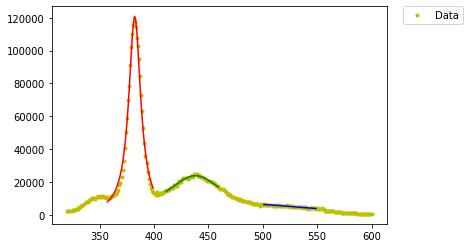

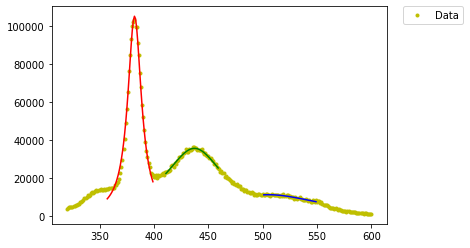

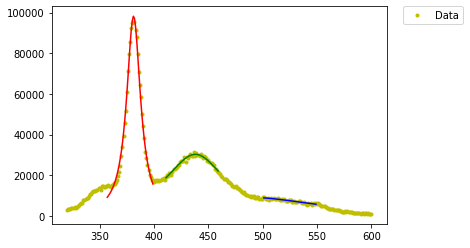

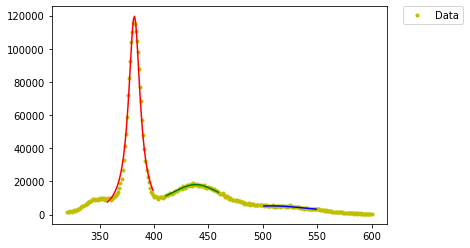

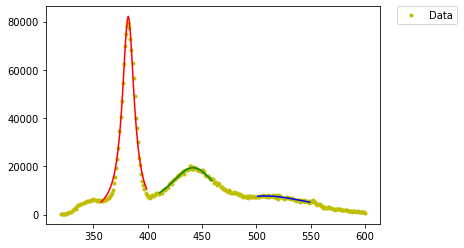

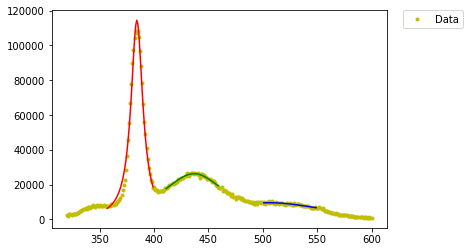

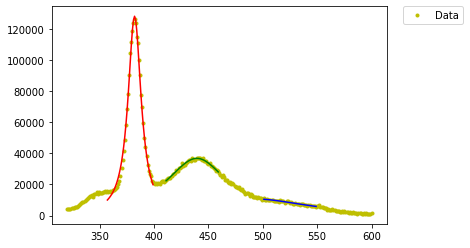

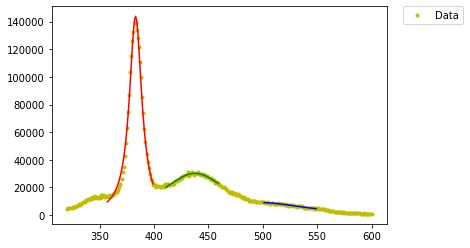

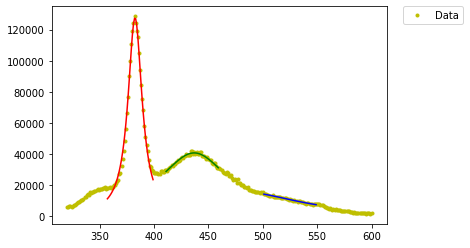

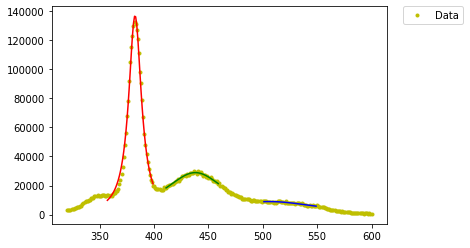

In [25]:
lam=df_specCAR['WL']
df0CAR=df_specCAR.drop(columns=['WL'])
h=list(df0CAR)
pp0=np.empty([len(h),9])
for i in np.arange(len(h)):
  y=df0CAR.values[:,i]
  xdata=lam[ (lam-356)*(lam-400)<0]
  ydata=y[(lam-356)*(lam-400)<0]
  p0=np.array([6E5,5,370])
  params, params_covariance = optimize.curve_fit(lorentzian,xdata,ydata,p0)
  yth=lorentzian(xdata, params[0],params[1],params[2]  )
  plt.plot(lam, y ,'y.',label='Data')
  plt.plot(xdata, yth,'r')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    #
  xdata1=lam[ (lam-410)*(lam-460)<0]
  ydata1=y[ (lam-410)*(lam-460)<0]
  p01=np.array([1E5,5,425])
  params1, params_covariance1 = optimize.curve_fit(lorentzian,xdata1,ydata1,p01)
  yth1=lorentzian(xdata1, params1[0],params1[1],params1[2]  )
  plt.plot(xdata1, yth1,'g')

  xdata2=lam[ (lam-500)*(lam-550)<0]
  ydata2=y[ (lam-500)*(lam-550)<0]
  p02=np.array([0.5E5,5,525])
  params2, params_covariance2 = optimize.curve_fit(lorentzian,xdata2,ydata2,p02)
  yth2=lorentzian(xdata2, params2[0],params2[1],params2[2]  )
  plt.plot(xdata2, yth2,'b')
  plt.show()
  prms= np.array([params,params1,params2])
  P=np.abs(prms.reshape(9,1).T)
  pp0[i,:]=P


In [26]:
D3CAR={'alpha_1':f2de(pp0[:,0]),'omega_1':f2de(pp0[:,1]),'lambdamax_1':f2de(pp0[:,2]),'alpha_2':f2de(pp0[:,3]),'omega_2':f2de(pp0[:,4]),'lambdamax_2':f2de(pp0[:,5]), 'alpha_3':f2de(pp0[:,6]),'omega_3':f2de(pp0[:,7]),'lambdamax_3':f2de(pp0[:,8])}
df=pd.DataFrame(D3CAR)
h=list(df0CAR)
L = [x[0:5] for x in h]
dfP=df.set_index(np.array(L))
dfP.to_csv('CARparams3.csv')
dfP

,alpha_1,omega_1,lambdamax_1,alpha_2,omega_2,lambdamax_2,alpha_3,omega_3,lambdamax_3
P39,121000.0,6.65,382.0,23800.0,32.8,438.0,6600.0,78.1,482.0
P40,105000.0,7.64,382.0,35500.0,34.0,437.0,11100.0,62.3,505.0
P41,98300.0,7.76,381.0,30300.0,34.5,438.0,9190.0,82.2,486.0
P43,120000.0,6.42,382.0,18000.0,35.4,438.0,5230.0,52.6,508.0
P19,82200.0,6.53,382.0,19400.0,28.5,442.0,7710.0,58.1,508.0
P62,114000.0,6.56,384.0,26200.0,36.9,437.0,9540.0,65.5,506.0
P69,128000.0,7.29,382.0,36800.0,35.3,439.0,10700.0,64.1,491.0
P72,144000.0,6.94,383.0,30200.0,37.8,438.0,9050.0,53.6,497.0
P79,128000.0,7.86,382.0,40600.0,40.1,437.0,15300.0,64.1,482.0
P80,137000.0,7.08,382.0,28900.0,35.5,438.0,8970.0,58.9,506.0


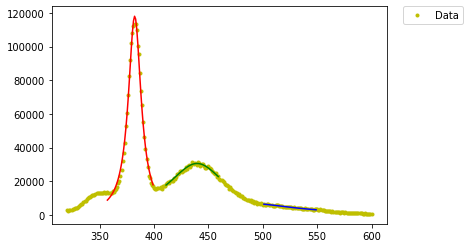

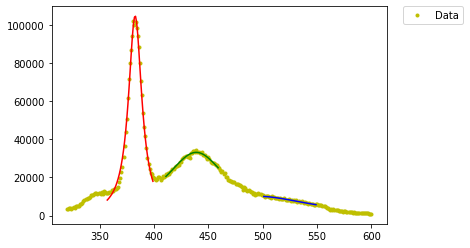

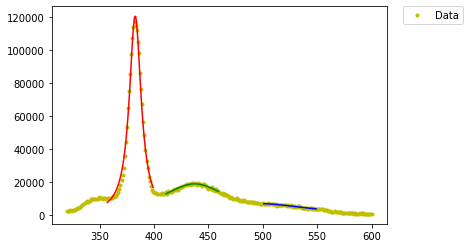

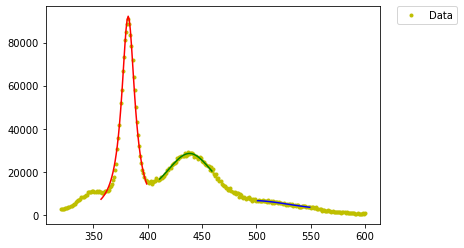

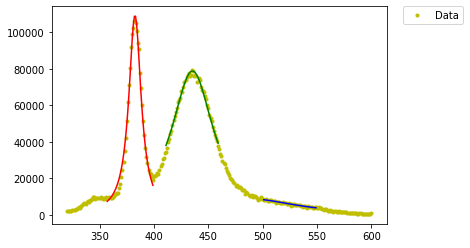

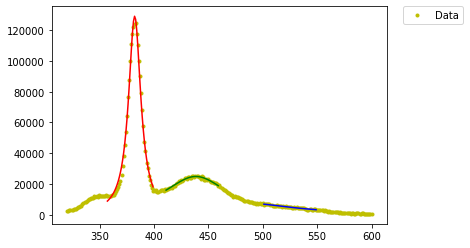

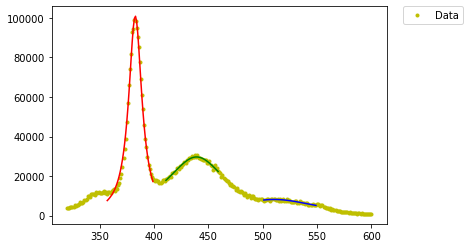

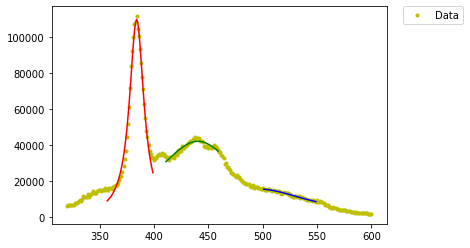

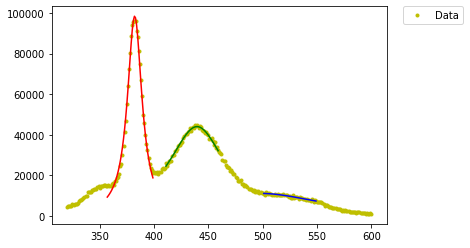

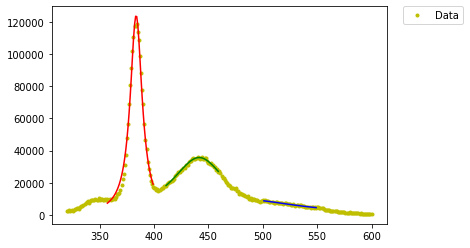

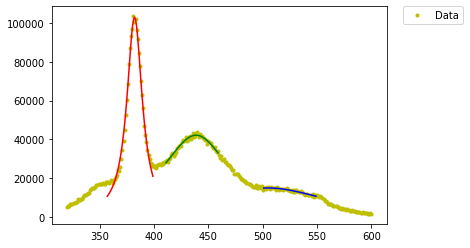

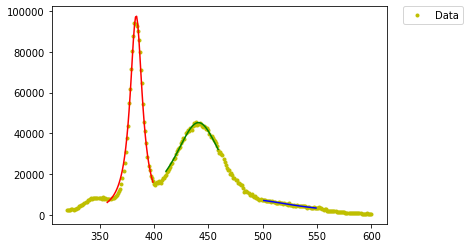

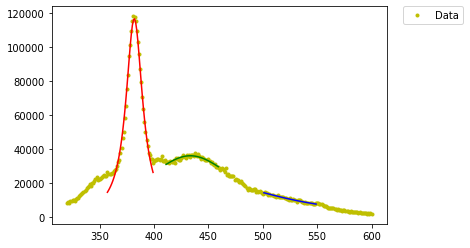

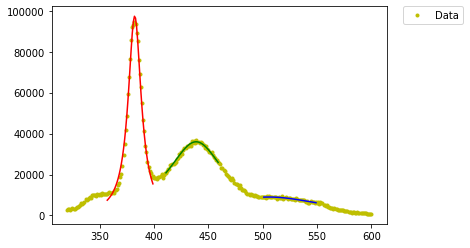

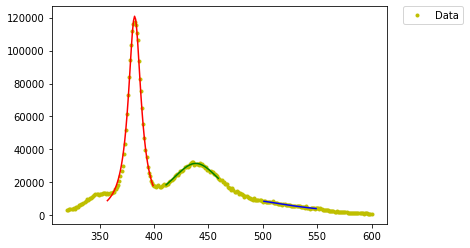

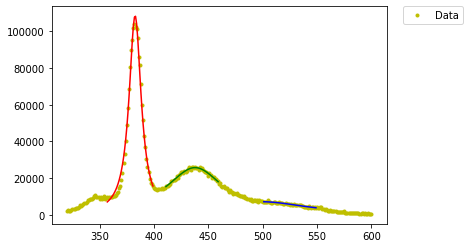

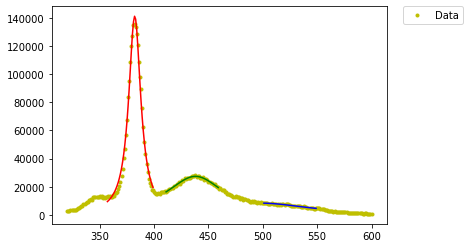

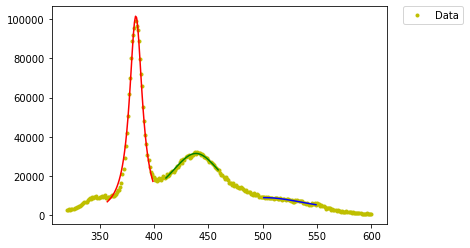

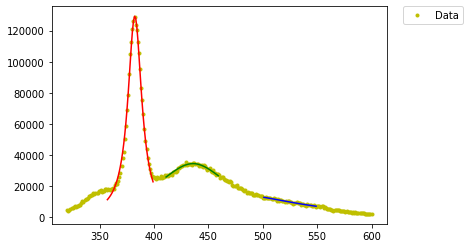

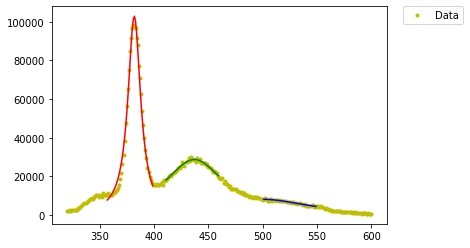

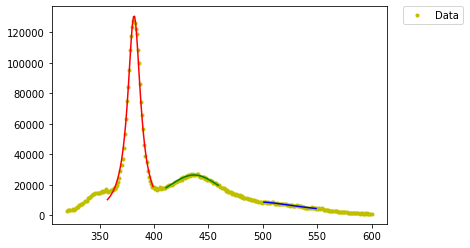

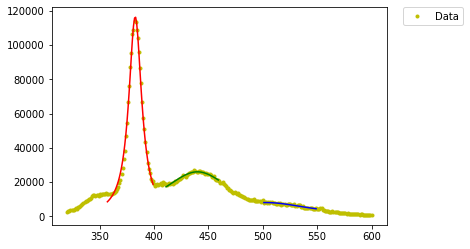

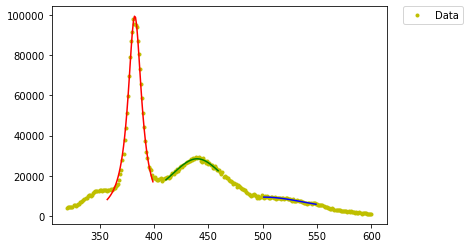

In [27]:
lam=df_specCONTP['WL']
df0CONTP=df_specCONTP.drop(columns=['WL'])
h=list(df0CONTP)
pp0=np.empty([len(h),9])
for i in np.arange(len(h)):
  y=df0CONTP.values[:,i]
  xdata=lam[ (lam-356)*(lam-400)<0]
  ydata=y[(lam-356)*(lam-400)<0]
  p0=np.array([6E5,5,370])
  params, params_covariance = optimize.curve_fit(lorentzian,xdata,ydata,p0)
  yth=lorentzian(xdata, params[0],params[1],params[2]  )
  plt.plot(lam, y ,'y.',label='Data')
  plt.plot(xdata, yth,'r')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    #
  xdata1=lam[ (lam-410)*(lam-460)<0]
  ydata1=y[ (lam-410)*(lam-460)<0]
  p01=np.array([1E5,5,425])
  params1, params_covariance1 = optimize.curve_fit(lorentzian,xdata1,ydata1,p01)
  yth1=lorentzian(xdata1, params1[0],params1[1],params1[2]  )
  plt.plot(xdata1, yth1,'g')

  xdata2=lam[ (lam-500)*(lam-550)<0]
  ydata2=y[ (lam-500)*(lam-550)<0]
  p02=np.array([0.5E5,5,525])
  params2, params_covariance2 = optimize.curve_fit(lorentzian,xdata2,ydata2,p02)
  yth2=lorentzian(xdata2, params2[0],params2[1],params2[2]  )
  plt.plot(xdata2, yth2,'b')
  plt.show()
  prms= np.array([params,params1,params2])
  P=np.abs(prms.reshape(9,1).T)
  pp0[i,:]=P

In [28]:
D3CONTP={'alpha_1':f2de(pp0[:,0]),'omega_1':f2de(pp0[:,1]),'lambdamax_1':f2de(pp0[:,2]),'alpha_2':f2de(pp0[:,3]),'omega_2':f2de(pp0[:,4]),'lambdamax_2':f2de(pp0[:,5]), 'alpha_3':f2de(pp0[:,6]),'omega_3':f2de(pp0[:,7]),'lambdamax_3':f2de(pp0[:,8])}
df=pd.DataFrame(D3CONTP)
h=list(df0CONTP)
L = [x[0:5] for x in h]
dfP=df.set_index(np.array(L))
dfP.to_csv('CONTPparams3.csv')
dfP

,alpha_1,omega_1,lambdamax_1,alpha_2,omega_2,lambdamax_2,alpha_3,omega_3,lambdamax_3
CP1,118000.0,7.14,382.0,30600.0,33.5,439.0,7040.0,58.5,483.0
CP2,105000.0,7.44,383.0,33200.0,35.5,439.0,10100.0,61.3,495.0
CP3,121000.0,6.57,383.0,18800.0,38.3,437.0,6790.0,55.9,497.0
CP4,92200.0,7.31,382.0,28500.0,32.5,438.0,6670.0,56.6,496.0
CP5,109000.0,6.87,383.0,78700.0,23.5,435.0,8730.0,54.0,488.0
CP6,129000.0,6.84,382.0,24900.0,36.8,438.0,7720.0,59.6,480.0
CP7,101000.0,7.37,383.0,29700.0,34.6,439.0,8180.0,50.6,511.0
CP8,110000.0,8.04,384.0,42000.0,48.3,440.0,15500.0,58.6,496.0
CP9,98500.0,8.14,382.0,44000.0,32.0,440.0,11100.0,72.7,497.0
CP10,124000.0,6.63,383.0,35700.0,31.2,441.0,9800.0,65.7,478.0
